In [ ]:
# Mount Google Drive so that files stored there can be accessed from Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

# Root folder of the project inside Google Drive
project_folder_path = '/content/drive/My Drive/Project_C4'

In [ ]:
# Load training datasets
df1 = pd.read_csv(os.path.join(project_folder_path, "training_data/citibike_all_daily_by_gender_age.csv"))
df2 = pd.read_csv(os.path.join(project_folder_path, "training_data/weather_with_days.csv"))

In [ ]:
# Load test datasets
df3 = pd.read_csv(os.path.join(project_folder_path, "test_data/citibike_all_daily_combined_20to23.csv"))
df4 = pd.read_csv(os.path.join(project_folder_path, "test_data/weather_with_days_20-23.csv"))

In [ ]:
# Aggregate bike-trip data to the daily level:
# - Sum total trips per day
# - Compute the median trip duration per day
df_bike_day = df1.groupby('date').agg(
    trips=('trips', 'sum'),
    median_duration=('median_duration', 'median')
).reset_index()

df_bike_day['median_duration'] = df_bike_day['median_duration'].astype(int)

df_bike_day.head()



,date,trips,median_duration
0,2013-06-01,8691,867
1,2013-06-02,15942,813
2,2013-06-03,7585,692
3,2013-06-04,15692,832
4,2013-06-05,15632,797


In [ ]:
# This block prepares the weather and bike-trip datasets for modeling by converting date fields
df2['date'] = pd.to_datetime(df2['time'])
df_weather_day = df2[['date', 'tavg', 'prcp', 'wspd', 'day_name', 'day_of_week', 'is_weekend', 'season']]
df_weather_day.head()

,date,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2013-06-01,28.1,0.0,17.1,Saturday,5,1,Spring
1,2013-06-02,27.8,0.0,21.1,Sunday,6,1,Spring
2,2013-06-03,23.6,44.6,13.2,Monday,0,0,Spring
3,2013-06-04,20.2,0.0,19.5,Tuesday,1,0,Spring
4,2013-06-05,19.0,0.0,14.2,Wednesday,2,0,Spring


In [ ]:
df_bike_day['date'] = pd.to_datetime(df_bike_day['date'])
df_train = df_bike_day.merge(df_weather_day, on='date', how='inner')
df_train.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2013-06-01,8691,867,28.1,0.0,17.1,Saturday,5,1,Spring
1,2013-06-02,15942,813,27.8,0.0,21.1,Sunday,6,1,Spring
2,2013-06-03,7585,692,23.6,44.6,13.2,Monday,0,0,Spring
3,2013-06-04,15692,832,20.2,0.0,19.5,Tuesday,1,0,Spring
4,2013-06-05,15632,797,19.0,0.0,14.2,Wednesday,2,0,Spring


In [ ]:
# Aggregate the test bike-trip dataset to daily level:
# - Sum total trips per day
# - Compute the median trip duration per day
df_bike_day2 = df3.groupby('date').agg(
    trips=('trips', 'sum'),
    median_duration=('median_duration', 'median')
).reset_index()

# Convert to int
df_bike_day2['median_duration'] = df_bike_day2['median_duration'].astype(int)

df_bike_day2.head()

,date,trips,median_duration
0,2020-01-01,18160,542
1,2020-01-02,41614,551
2,2020-01-03,31920,522
3,2020-01-04,29480,526
4,2020-01-05,27636,500


In [ ]:
# This block prepares the weather and bike-trip datasets for modeling by converting date fields
df4['date'] = pd.to_datetime(df4['time'])
df_weather_day2 = df4[['date', 'tavg', 'prcp', 'wspd', 'day_name', 'day_of_week', 'is_weekend', 'season']]
df_weather_day2.head()

,date,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2020-01-01,4.4,0.0,17.9,Wednesday,2,0,Winter
1,2020-01-02,3.7,0.9,12.6,Thursday,3,0,Winter
2,2020-01-03,7.5,3.0,8.8,Friday,4,0,Winter
3,2020-01-04,8.2,4.5,6.5,Saturday,5,1,Winter
4,2020-01-05,5.7,0.3,7.4,Sunday,6,1,Winter


In [ ]:
df_bike_day2['date'] = pd.to_datetime(df_bike_day2['date'])
df_test = df_bike_day2.merge(df_weather_day2, on='date', how='inner')
df_test.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2020-01-01,18160,542,4.4,0.0,17.9,Wednesday,2,0,Winter
1,2020-01-02,41614,551,3.7,0.9,12.6,Thursday,3,0,Winter
2,2020-01-03,31920,522,7.5,3.0,8.8,Friday,4,0,Winter
3,2020-01-04,29480,526,8.2,4.5,6.5,Saturday,5,1,Winter
4,2020-01-05,27636,500,5.7,0.3,7.4,Sunday,6,1,Winter


In [ ]:
# Load the final merged training dataset (bike trips + weather features) from CSV
df = pd.read_csv(os.path.join(project_folder_path, "training_data/merged_citibike_weather.csv"))
df.head()

,date,gender,age_group,trips,avg_duration,median_duration,unique_bikes,subscribers,customers,tavg,tmin,tmax,prcp,wspd,coco,weather,day_name,day_of_week,is_weekend,season
0,2013-06-01,Female,18-25,56,4439.1,896.0,49,56,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
1,2013-06-01,Unknown,Unknown,3574,2588.4,1360.0,1898,0,3574,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
2,2013-06-01,Unknown,18-25,7,2019.0,1329.0,7,7,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
3,2013-06-01,Male,<18,6,815.5,582.5,5,6,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
4,2013-06-01,Male,46-60,860,1761.8,736.0,677,860,0,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring


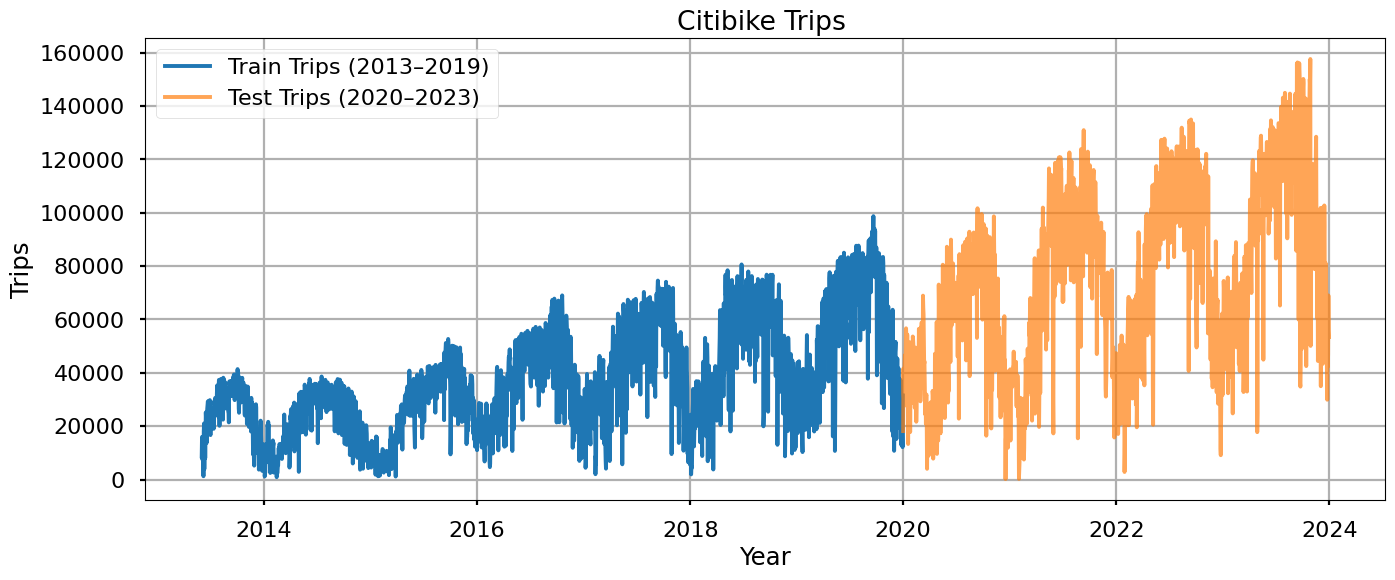

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(16,6))
#Training trip data
plt.plot(df_train['date'], df_train['trips'], label="Train Trips (2013–2019)")
#Test trip data
plt.plot(df_test['date'], df_test['trips'], label="Test Trips (2020–2023)", alpha=0.7)
plt.title("Citibike Trips ")
plt.xlabel("Year")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-1423098001.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = df_train.groupby("temp_bin")["trips"].mean()


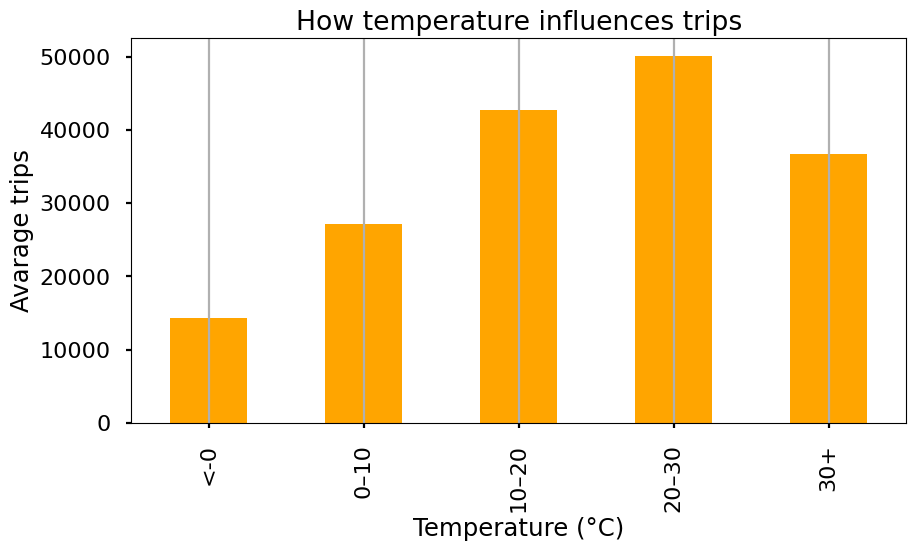

In [ ]:
# Create temperature bins to group days into meaningful temperature ranges
df_train['temp_bin'] = pd.cut(
    df_train['tavg'],
    bins=[-10, 0, 10, 20, 30, 40],
    labels=["<-0", "0–10", "10–20", "20–30", "30+"]
)
# Compute the average number of trips for each temperature bin
temp_avg = df_train.groupby("temp_bin")["trips"].mean()

# Plot how average trips vary across temperature ranges
plt.figure(figsize=(10,5))
temp_avg.plot(kind="bar", color="orange")
plt.title("How temperature influences trips")
plt.xlabel("Temperature (°C)")
plt.ylabel("Avarage trips")
plt.grid(axis='y')
plt.show()



/tmp/ipython-input-2427169870.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_avg = df_train.groupby("rain_bin")["trips"].mean()


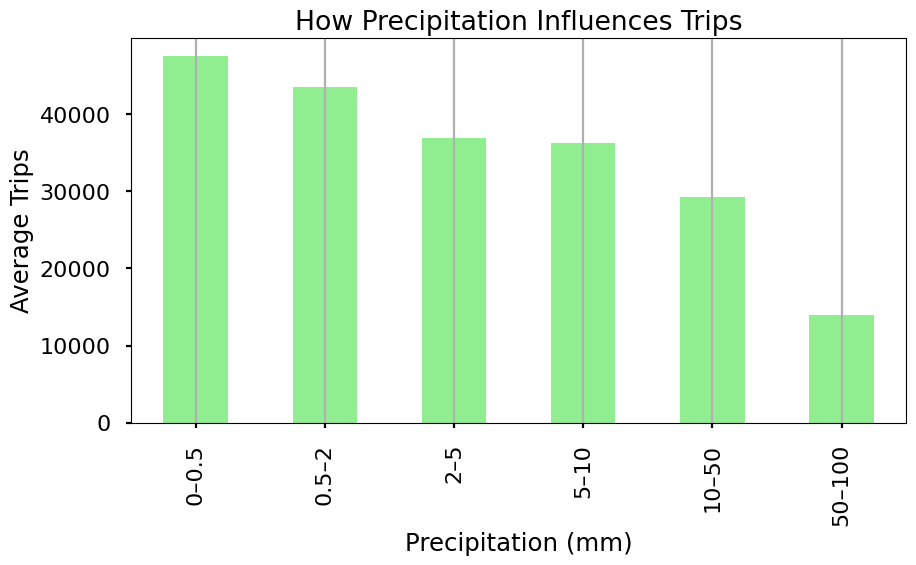

In [ ]:
# Create precipitation bins to group days by rainfall intensity
df_train['rain_bin'] = pd.cut(
    df_train['prcp'],
    bins=[0, 0.5, 2, 5, 10, 50, 100],
    labels=["0–0.5", "0.5–2", "2–5", "5–10", "10–50", "50–100"]
)

# Calculate the average number of trips for each precipitation range
rain_avg = df_train.groupby("rain_bin")["trips"].mean()

# Plot how trip volume changes under different rainfall levels
plt.figure(figsize=(10, 5))
rain_avg.plot(kind="bar", color="lightgreen")

plt.title("How Precipitation Influences Trips")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Average Trips")
plt.grid(axis='y')

plt.show()





/tmp/ipython-input-1134388119.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_avg = df_train.groupby("wind_bin")["trips"].mean()


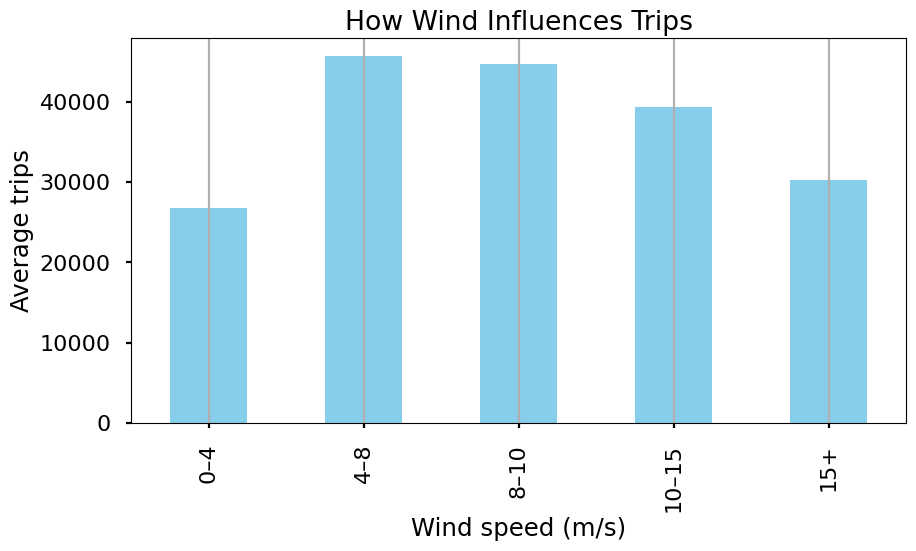

In [ ]:
# Create wind speed bins to categorize days by wind intensity
df_train['wind_bin'] = pd.cut(
    df_train['wspd'],
    bins=[0, 4, 8, 10, 15, 30],
    labels=["0–4", "4–8", "8–10", "10–15", "15+"]
)

# Calculate the average number of trips for each wind-speed category
wind_avg = df_train.groupby("wind_bin")["trips"].mean()

# Plot how trip volume changes under different wind conditions
plt.figure(figsize=(10, 5))
wind_avg.plot(kind="bar", color="skyblue")

plt.title("How Wind Influences Trips")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Average trips")
plt.grid(axis='y')

plt.show()





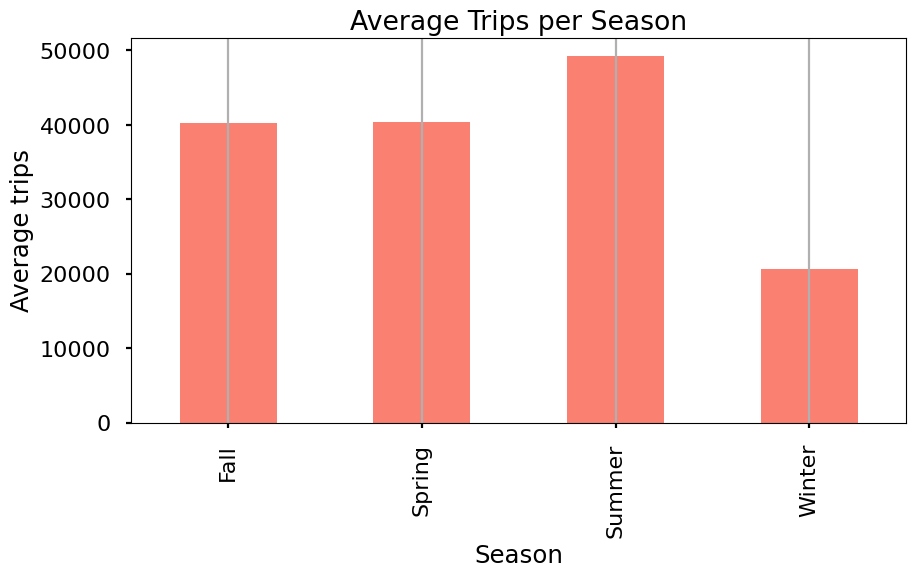

In [ ]:
# Compute the average number of daily trips for each season
season_avg = df_train.groupby("season")["trips"].mean()

# Plot the seasonal variation in average trip volume
plt.figure(figsize=(10, 5))
season_avg.plot(kind="bar", color="salmon")

plt.title("Average Trips per Season")
plt.xlabel("Season")
plt.ylabel("Average trips")
plt.grid(axis='y')

plt.show()



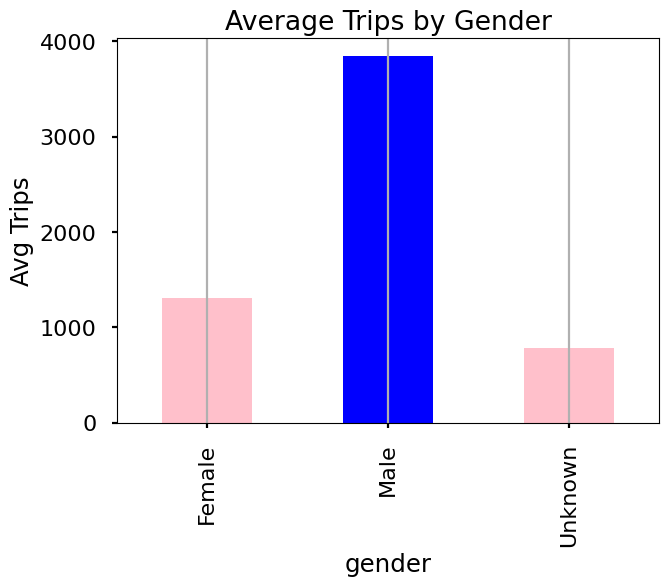

In [ ]:
# Calculate the average number of trips for each gender category
gender_avg = df1.groupby("gender")["trips"].mean()

# Plot the average trip volume by gender
plt.figure(figsize=(7, 5))
gender_avg.plot(kind="bar", color=["pink", "blue"])

plt.title("Average Trips by Gender")
plt.ylabel("Avg Trips")
plt.grid(axis="y")

plt.show()


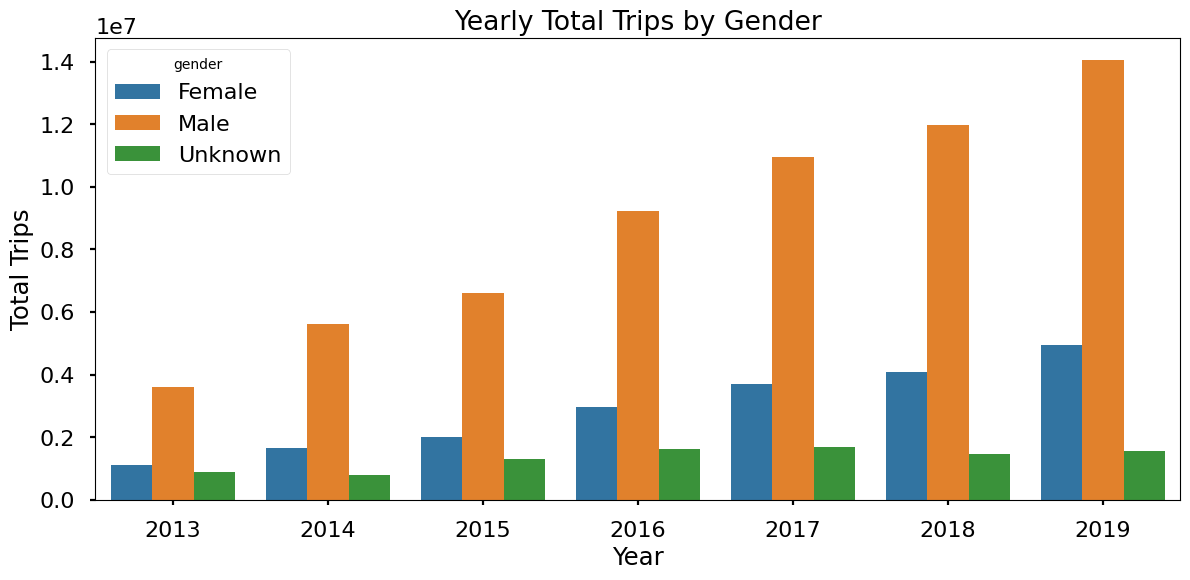

In [ ]:
# Convert the date column to datetime format and extract the year
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year

# Calculate total annual trips for each gender
df_year_gender = df1.groupby(['year', 'gender'])['trips'].sum().reset_index()

# Plot yearly trip totals separated by gender
plt.figure(figsize=(14, 6))
sns.barplot(data=df_year_gender, x='year', y='trips', hue='gender')

plt.title("Yearly Total Trips by Gender")
plt.xlabel("Year")
plt.ylabel("Total Trips")
plt.grid(axis='y')

plt.show()



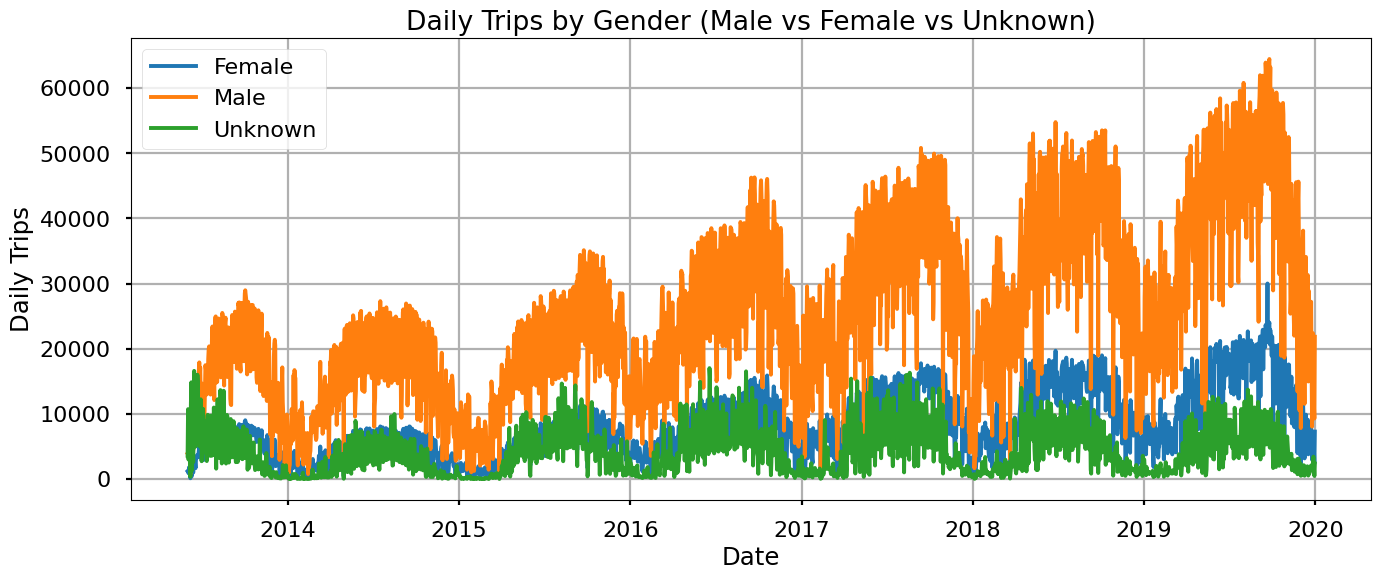

In [ ]:
# Compute daily total trips for each gender category
df_daily_gender = df1.groupby(['date', 'gender'])['trips'].sum().reset_index()

# Plot daily trip trends separately for each gender
plt.figure(figsize=(16, 6))

# Loop through each gender and plot its daily trip time series
for g in df_daily_gender['gender'].unique():
    subset = df_daily_gender[df_daily_gender['gender'] == g]
    plt.plot(subset['date'], subset['trips'], label=g)

plt.title("Daily Trips by Gender (Male vs Female vs Unknown)")
plt.xlabel("Date")
plt.ylabel("Daily Trips")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Add a boolean indicator for whether any precipitation occurred on a given day
df['has_preipitation'] = df['prcp'] > 0

# Compare average trip counts across genders on rainy vs. non-rainy days
df.groupby(['has_preipitation', 'gender'])['trips'].mean()


has_preipitation  gender 
False             Female     1301.592474
                  Male       3752.525620
                  Unknown     993.046287
True              Female     1320.046611
                  Male       3924.109979
                  Unknown     626.571325
Name: trips, dtype: float64

In [ ]:
# Compute and rank the average median trip duration across different age groups
df.groupby('age_group')['median_duration'].mean().sort_values()

,median_duration
age_group,
36-45,589.141169
26-35,613.707458
18-25,637.024032
60+,646.174301
46-60,655.053547
<18,736.907556
Unknown,884.492411


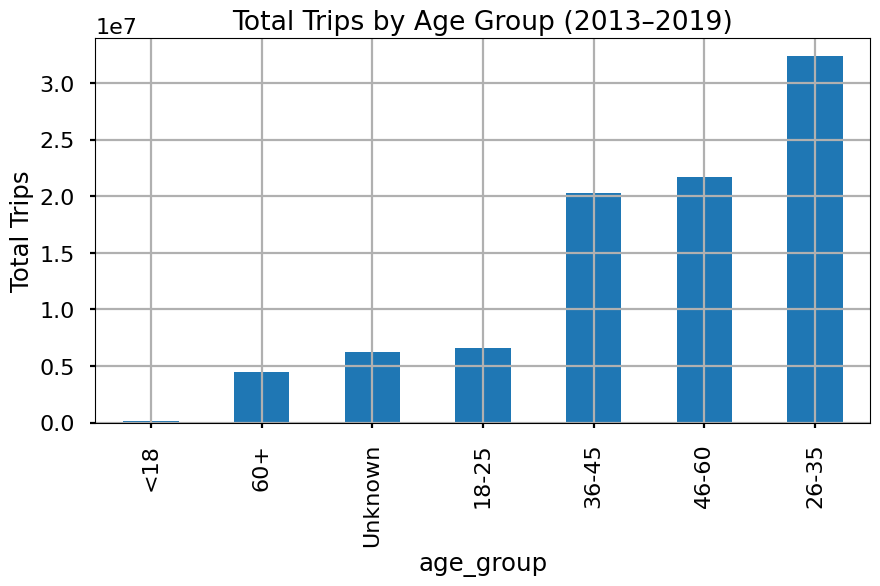

In [ ]:
# Calculate total trips for each age group and sort them from lowest to highest
df_age = df.groupby('age_group')['trips'].sum().sort_values()

# Plot total trip volume by age group
df_age.plot(kind='bar', figsize=(10, 5),
            title='Total Trips by Age Group (2013–2019)')

plt.ylabel('Total Trips')
plt.show()


In [ ]:
# Create a filtered version of the dataset where:
# - 'coco' values are not missing
# - weather category is known (excluding 'Unknown')
df_coco_clean = df[
    df['coco'].notna() &
    (df['weather'] != 'Unknown')
].copy()

# Summarize trip statistics for each (coco, weather) combination:
# - number of days in that category
# - total trips
# - average trips
df_coco_clean.groupby(['coco', 'weather']).agg(
    days=('date', 'count'),
    total_trips=('trips', 'sum'),
    avg_trips=('trips', 'mean')
)


,,days,total_trips,avg_trips
coco,weather,,,
2.0,Fair,2727,7665940,2811.125779
3.0,Cloudy,4137,12003041,2901.387721
4.0,Overcast,1322,3218502,2434.570348
5.0,Fog,580,971961,1675.794828
7.0,Light rain,2604,5461013,2097.163210
8.0,Rain,785,1729246,2202.861146
9.0,Heavy rain,194,369944,1906.927835
10.0,Freezing rain,16,5881,367.562500
13.0,Heavy sleet,18,24729,1373.833333


In [ ]:
# Convert the date column to datetime, then extract year and month for time-based analysis
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create yearly total trips table
df_yearly = df.groupby("year")["trips"].sum()

In [ ]:
# Show total annual trips across all years in the dataset
display(df.groupby('year')['trips'].sum())

,trips
year,
2013,5614254
2014,8080663
2015,9935377
2016,13806220
2017,16344585
2018,17543815
2019,20545579


In [ ]:
# Show total annual trips across all months in the dataset
df.groupby('month')['trips'].sum()

,trips
month,
1,3504424
2,3552553
3,4726701
4,6723307
5,8310706
6,9723329
7,10106159
8,10837749
9,11125399


In [ ]:
# Calculate the total number of trips made by each age group
df.groupby('age_group')['trips'].sum()


,trips
age_group,
18-25,6596749
26-35,32387400
36-45,20267913
46-60,21729126
60+,4487393
<18,165767
Unknown,6236145


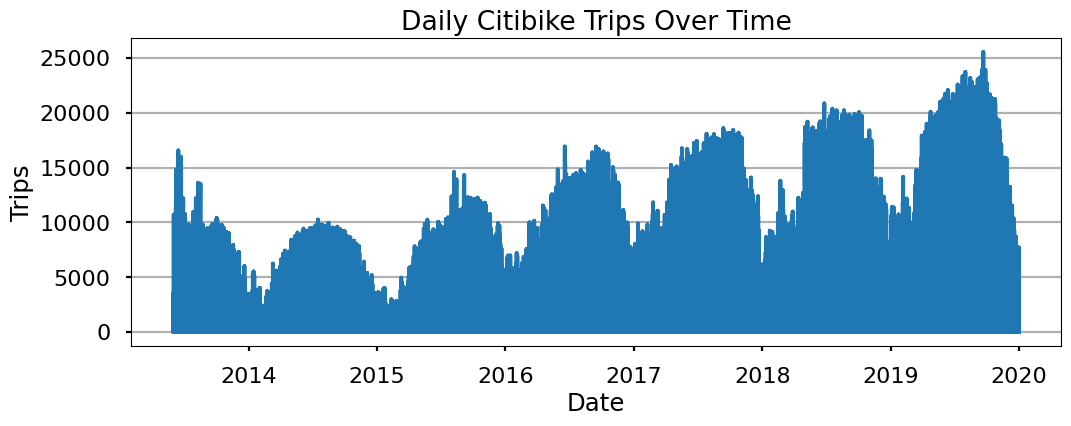

In [ ]:
# Plot the daily trend of Citibike trip counts across the entire dataset
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['trips'])
plt.title("Daily Citibike Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.show()


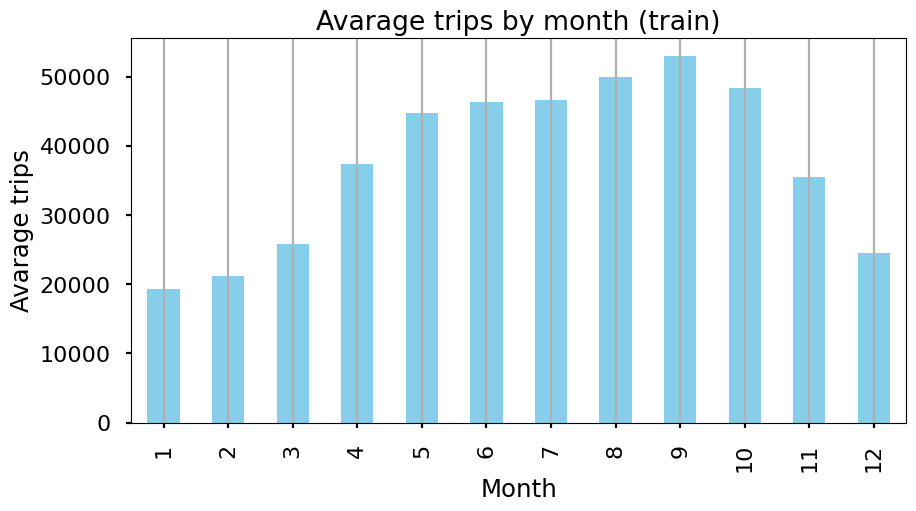

In [ ]:
# Extract month from the date column and plot the average number of trips for each month (training data)
df_train['month'] = df_train['date'].dt.month
monthly_avg = df_train.groupby("month")["trips"].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind="bar", color="skyblue")

plt.title("Avarage trips by month (train)")
plt.xlabel("Month")
plt.ylabel("Avarage trips")
plt.grid(axis='y')
plt.show()


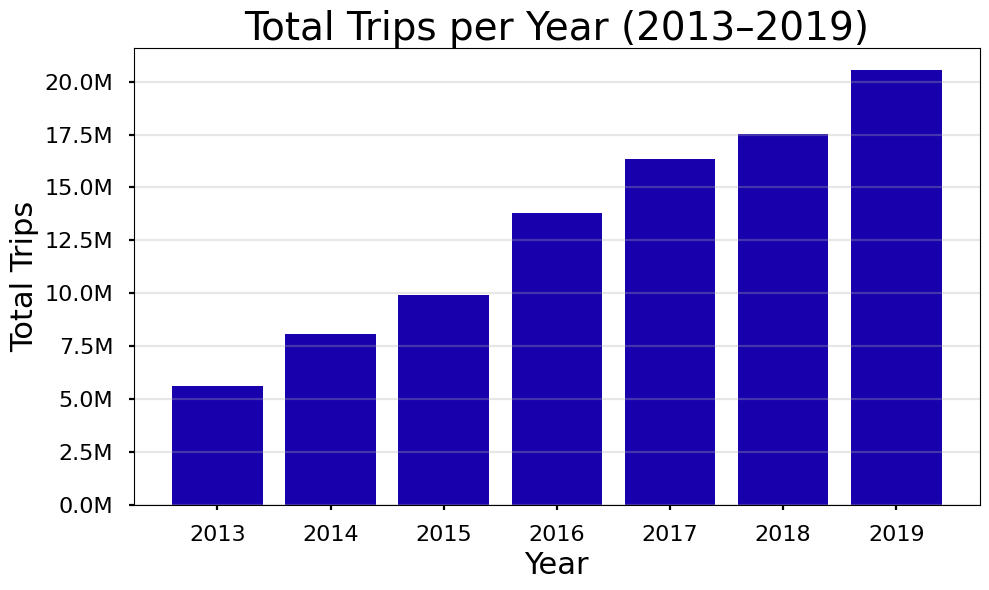

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('seaborn-v0_8-poster')


# Enable gridlines only on the Y-axis for readability
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'

fig = plt.figure(figsize=(10, 6))

# Title and axis labels
plt.title("Total Trips per Year (2013–2019)", fontsize=28)
plt.xlabel("Year", fontsize=22)
plt.ylabel("Total Trips", fontsize=22)

plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))

plt.grid(axis='y', alpha=0.3, zorder=1)

plt.bar(df_yearly.index, df_yearly.values, color="#1800ad", zorder=0)

plt.tight_layout()
# Save the figure to a PDF file
plt.savefig("figure1.pdf")

plt.show()